# **Loading the Libraries and Data**

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/bank-customer-segmentation")

print("Path to dataset files:", path)

100%|██████████| 24.2M/24.2M [00:00<00:00, 97.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/bank-customer-segmentation/versions/1


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [4]:
!ls /root/.cache/kagglehub/datasets/shivamb/bank-customer-segmentation/versions/1

bank_transactions.csv


In [5]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/shivamb/bank-customer-segmentation/versions/1/bank_transactions.csv")

In [6]:
df.shape

(1048567, 9)

In [7]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [9]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1046198.0,115403.54,846485.38,0.0,4721.76,16792.18,57657.36,1.150355e+08
TransactionTime,1048567.0,157087.53,51261.85,0.0,124030.00,164226.00,200010.00,2.359590e+05
TransactionAmount (INR),1048567.0,1574.34,6574.74,0.0,161.00,459.03,1200.00,1.560035e+06


In [10]:
df.shape

(1048567, 9)

In [11]:
df.isna().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [12]:
round((df.isna().sum().sum() / df.shape[0]) * 100, 2)

0.67

In [13]:
df.duplicated().sum()

0

# **Data Cleaning**

In [14]:
df1 = df.copy()

In [15]:
df1.dropna(inplace = True)
df1.isna().sum().sum()

0

In [16]:
from pandas.tseries.offsets import DateOffset
df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'], errors='coerce')

# Fix years manually for dates interpreted as 2000+
df1.loc[df1['CustomerDOB'].dt.year > 2000, 'CustomerDOB'] -= DateOffset(years=100)

In [17]:
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [18]:
df1['CustomerBY'] = df1['CustomerDOB'].dt.year
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerBY
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,1994
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,1957
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,1996
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,1973
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,1988


In [19]:
df1[df1['CustomerBY'] > 2016].shape[0]

0

# **Feature Engineering**

In [20]:
df2 = df1.copy()

In [21]:
df2['CustGender'].value_counts()

,count
CustGender,
M,760978
F,280635
T,1


**Assuming the gender "T" as outlier as there are only 1 record associated with it**




In [22]:
df2 = df2[df2['CustGender'] != 'T']
df2['CustGender'].value_counts()

,count
CustGender,
M,760978
F,280635


In [23]:
df2['CustGender'] = df2['CustGender'].map({'M': 'Male', 'F': 'Female'})
df2['CustGender'].value_counts()

,count
CustGender,
Male,760978
Female,280635


**Create an age column by substracting the birth year from the cuurent year (2016 as the dataset contains 2016 data)**

In [24]:
df2['CustAge'] = 2016 - df2['CustomerBY']
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerBY,CustAge
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,1994,22
1,T2,C2142763,1957-04-04,Male,JHAJJAR,2270.69,2/8/16,141858,27999.0,1957,59
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2/8/16,142712,459.0,1996,20
3,T4,C5342380,1973-09-14,Female,MUMBAI,866503.21,2/8/16,142714,2060.0,1973,43
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,1988,28


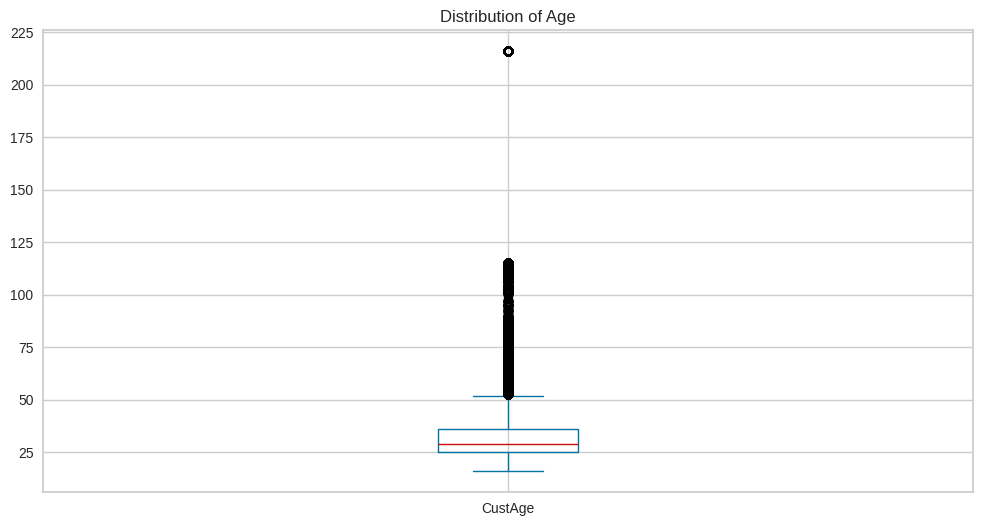

In [25]:
df2['CustAge'].plot(kind = 'box', figsize=(12, 6), title='Distribution of Age')
plt.show()

In [26]:
df2.describe().transpose().round(2)

,count,mean,min,25%,50%,75%,max,std
CustomerDOB,1041613,1975-05-19 12:15:38.269395680,1800-01-01 00:00:00,1980-07-12 00:00:00,1987-03-21 00:00:00,1991-02-13 00:00:00,2000-12-25 00:00:00,NaN
CustAccountBalance,1041613.0,114998.667637,0.0,4728.14,16768.52,57428.85,115035495.1,846761.344391
TransactionTime,1041613.0,157122.103313,0.0,124041.0,164247.0,200022.0,235959.0,51263.53895
TransactionAmount (INR),1041613.0,1566.066381,0.0,160.0,457.5,1200.0,1560034.99,6561.397517
CustomerBY,1041613.0,1974.914548,1800.0,1980.0,1987.0,1991.0,2000.0,42.708339
CustAge,1041613.0,41.085452,16.0,25.0,29.0,36.0,216.0,42.708339


**Age with more that 100 years treating as outliers**

In [27]:
df2[df2['CustAge'] > 100].shape[0]

56911

In [28]:
df2 = df2[df2['CustAge'] <= 100]
df2.describe().transpose().round(2)

,count,mean,min,25%,50%,75%,max,std
CustomerDOB,984702,1985-06-13 08:53:24.523602112,1916-02-22 00:00:00,1982-01-30 00:00:00,1987-09-13 00:00:00,1991-05-05 00:00:00,2000-12-25 00:00:00,NaN
CustAccountBalance,984702.0,106098.849498,0.0,4584.1,16010.04,53766.58,115035495.1,818156.044096
TransactionTime,984702.0,157435.698211,0.0,124242.0,164627.0,200151.0,235959.0,51271.560342
TransactionAmount (INR),984702.0,1452.026805,0.0,151.0,431.0,1125.0,1560034.99,6140.609584
CustomerBY,984702.0,1984.957661,1916.0,1982.0,1987.0,1991.0,2000.0,8.745263
CustAge,984702.0,31.042339,16.0,25.0,29.0,34.0,100.0,8.745263


In [29]:
df2.reset_index(drop = True, inplace = True)

In [30]:
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerBY,CustAge
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,1994,22
1,T2,C2142763,1957-04-04,Male,JHAJJAR,2270.69,2/8/16,141858,27999.0,1957,59
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2/8/16,142712,459.0,1996,20
3,T4,C5342380,1973-09-14,Female,MUMBAI,866503.21,2/8/16,142714,2060.0,1973,43
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,1988,28


In [31]:
df2.drop('CustomerBY', axis = 1, inplace = True)

In [32]:
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,22
1,T2,C2142763,1957-04-04,Male,JHAJJAR,2270.69,2/8/16,141858,27999.0,59
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2/8/16,142712,459.0,20
3,T4,C5342380,1973-09-14,Female,MUMBAI,866503.21,2/8/16,142714,2060.0,43
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,28


# **Data Preprocessing**

**We will perform the following transformtions:**

1) Log transformation of some of the Skewed Features.

2) Encoding the Categorical data.

3) Standard Scaling (Z-score) all the features.

4) Dimension Reduction (readuce to 3D).

In [33]:
df3 = df2.copy()

In [34]:
df3.drop(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustLocation', 'TransactionDate', 'TransactionTime'], axis = 1, inplace = True)
df3.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge
0,Female,17819.05,25.0,22
1,Male,2270.69,27999.0,59
2,Female,17874.44,459.0,20
3,Female,866503.21,2060.0,43
4,Female,6714.43,1762.5,28


In [35]:
skew_df = pd.DataFrame(df3.select_dtypes(np.number).columns, columns=['Feature'])
skew_df

,Feature
0,CustAccountBalance
1,TransactionAmount (INR)
2,CustAge


In [36]:
skew_df['Skew'] = skew_df['Feature'].apply(lambda x: scipy.stats.skew(df3[x]))
skew_df

,Feature,Skew
0,CustAccountBalance,66.394692
1,TransactionAmount (INR),57.255548
2,CustAge,1.797583


In [37]:
skew_df['Skewed'] = skew_df['Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Skewed
0,CustAccountBalance,66.394692,True
1,TransactionAmount (INR),57.255548,True
2,CustAge,1.797583,True


In [38]:
for column in skew_df.query("Skewed == True")['Feature'].values:
  df3[column] = np.log1p(df3[column])

df3.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge
0,Female,9.788080,3.258097,3.135494
1,Male,7.728279,10.239960,4.094345
2,Female,9.791183,6.131226,3.044522
3,Female,13.672222,7.630947,3.784190
4,Female,8.812163,7.475056,3.367296


In [39]:
df4 = df3.copy()

In [40]:
df4 = pd.get_dummies(df4, drop_first = True).astype(int)
df4.head()

,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender_Male
0,9,3,3,0
1,7,10,4,1
2,9,6,3,0
3,13,7,3,0
4,8,7,3,0


In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984702 entries, 0 to 984701
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   CustAccountBalance       984702 non-null  int64
 1   TransactionAmount (INR)  984702 non-null  int64
 2   CustAge                  984702 non-null  int64
 3   CustGender_Male          984702 non-null  int64
dtypes: int64(4)
memory usage: 30.1 MB


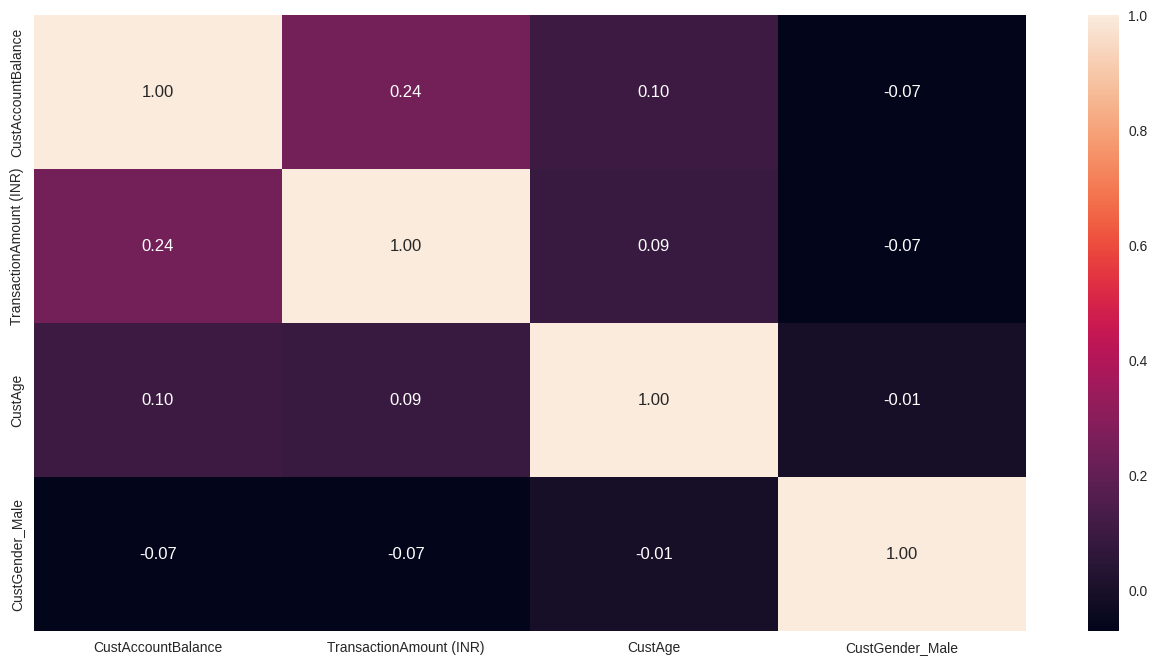

In [42]:
plt.figure(figsize= (16, 8))
sns.heatmap(df4.corr(), annot = True, fmt = '.2f');

In [43]:
df5 = df4.copy()

In [44]:
scaler = StandardScaler()
scaler.fit(df5)

StandardScaler()

In [45]:
df5 = pd.DataFrame(scaler.transform(df5), columns = df5.columns)
df5.head()

,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender_Male
0,0.041787,-1.547123,-0.096901,-1.615999
1,-0.763311,2.789209,4.951709,0.618812
2,0.041787,0.311305,-0.096901,-1.615999
3,1.651984,0.930781,-0.096901,-1.615999
4,-0.360762,0.930781,-0.096901,-1.615999


# **Principle Component Analysis(PCA)**

Now, that we have so many features, we cannot visualize those together after clustering as we can only show at most 3 variables together in a plot (3D) plot.

In these cases, Dimensionality Reduction techniques like **PCA (Principle Component Analysis)** are applied. Apply PCA we will reduce dimensions to 3.

Principle Components are build in an combination of the original variables. Principal Components represent the directions of the data that explain a maximal amount of variance, that is to say, capture most information of the data.

After reduction we will plot it.

In [46]:
# Apply PCA
pca = PCA()
pca.fit(df5)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print explained variance ratios and cumulative variance
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)

# Find the number of components that retain ~95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal n_components:", n_components)

Explained Variance Ratio: [0.33276476 0.248656   0.22971781 0.18886143]
Cumulative Variance: [0.33276476 0.58142076 0.81113857 1.        ]
Optimal n_components: 4


In [47]:
pca = PCA(n_components=3)
pca.fit(df5)

df6 = pd.DataFrame(pca.transform(df5), columns=(["PC1","PC2", "PC3"]))
df6.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,984702.0,6.407644e-18,1.153716,-6.208507,-0.645595,0.017824,0.659577,6.088266
PC2,984702.0,3.747894e-17,0.997309,-4.357082,-1.352798,0.445493,0.460071,3.435199
PC3,984702.0,-2.977967e-17,0.958578,-5.904759,-0.541102,-0.127609,0.462319,6.698573


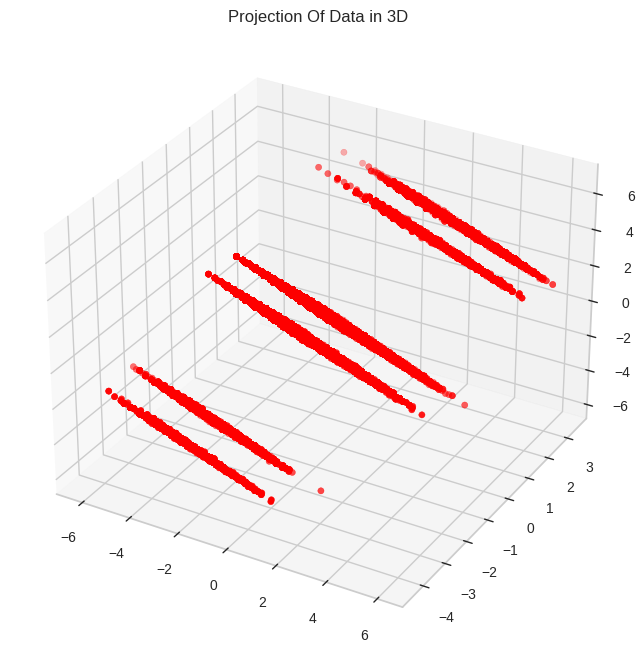

In [48]:
#Let's plot this together in a 3D plot to better undertstand the relationship among those

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df6["PC1"], df6["PC2"], df6["PC3"], c="red", marker="o")
ax.set_title("Projection Of Data in 3D")
plt.show()

# **Clustering**

Let us perform KMeans Clustering. The steps are:-

1) Finding right number of cluster through elbow method.

2) Fitting KMeans Clustering model.

3) Examining the clusters.

*** For smaller dataset, perform Agglomerative Clustering (Hierarchical Clustering). Hierarchical Clustering takes more time to run and can crash the memory for larger datasets.

In [49]:
df7 = df6.copy()

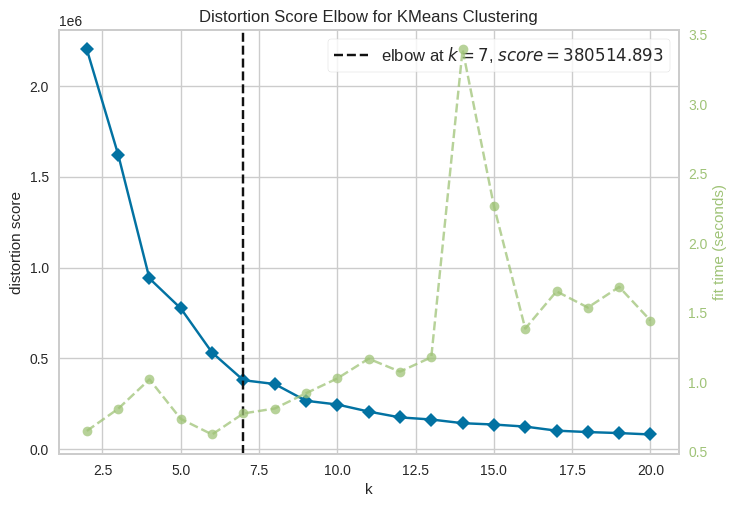

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
Elbow = KElbowVisualizer(KMeans(), k = 20)
Elbow.fit(df7)
Elbow.show()

In [51]:
kmeans = KMeans(n_clusters=7)

yhat = kmeans.fit_predict(df7)
yhat

array([5, 4, 2, ..., 3, 1, 3], dtype=int32)

In [52]:
#yhat = yhat_ac

In [53]:
np.unique(yhat)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [54]:
df7['Clusters'] = yhat
df7.head()

,PC1,PC2,PC3,Clusters
0,-0.540735,-1.367220,1.255870,5
1,2.930528,3.302109,2.599993,4
2,0.623230,-1.381329,0.626499,2
3,2.026278,-1.347782,-0.081918,2
4,0.757453,-1.395594,0.541365,2


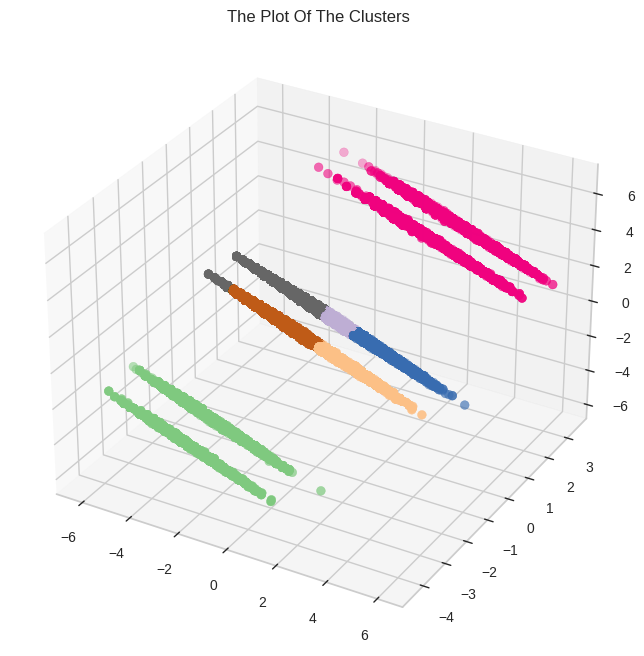

In [55]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df7["PC1"],df7["PC2"],df7["PC3"], s=40, c=df7["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

In [56]:
df7 = df7.replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4:'Cluster 5', 5:'Cluster 6', 6:'Cluster 7'})
df7.head()

,PC1,PC2,PC3,Clusters
0,-0.540735,-1.367220,1.255870,Cluster 6
1,2.930528,3.302109,2.599993,Cluster 5
2,0.623230,-1.381329,0.626499,Cluster 3
3,2.026278,-1.347782,-0.081918,Cluster 3
4,0.757453,-1.395594,0.541365,Cluster 3


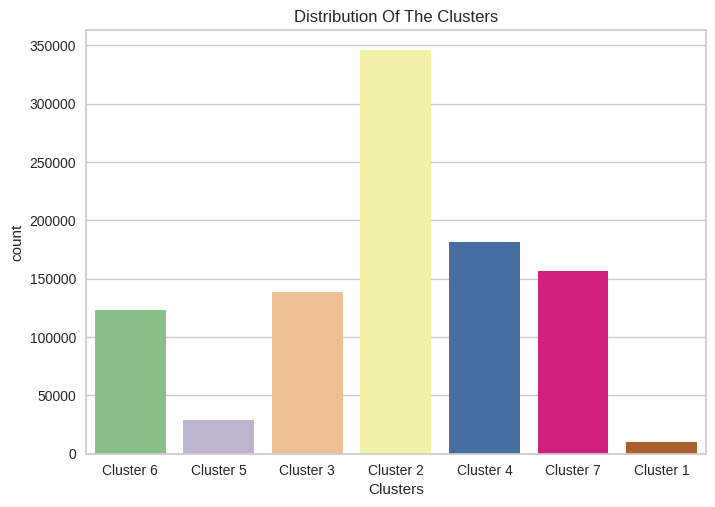

In [57]:
sns.countplot(x = df7['Clusters'], palette= "Accent")
plt.title('Distribution Of The Clusters')
plt.show()

# **Cluster Profiling**

"df2" is the cleaned one. We need to assign the cluster levels from "df7" to the "df2" and make summary statistics of different variables for different clusters.

This is called ***Cluster Profiling***.

In [58]:
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,22
1,T2,C2142763,1957-04-04,Male,JHAJJAR,2270.69,2/8/16,141858,27999.0,59
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2/8/16,142712,459.0,20
3,T4,C5342380,1973-09-14,Female,MUMBAI,866503.21,2/8/16,142714,2060.0,43
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,28


In [59]:
df2.shape

(984702, 10)

In [60]:
final = df2.merge(df7['Clusters'], left_index = True, right_index = True)
final.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge,Clusters
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,22,Cluster 6
1,T2,C2142763,1957-04-04,Male,JHAJJAR,2270.69,2/8/16,141858,27999.0,59,Cluster 5
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2/8/16,142712,459.0,20,Cluster 3
3,T4,C5342380,1973-09-14,Female,MUMBAI,866503.21,2/8/16,142714,2060.0,43,Cluster 3
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,28,Cluster 3


In [61]:
summary = final[['Clusters', 'CustAccountBalance', 'TransactionAmount (INR)', 'CustAge']]
summary.set_index("Clusters", inplace = True)
summary.head()

,CustAccountBalance,TransactionAmount (INR),CustAge
Clusters,,,
Cluster 6,17819.05,25.0,22
Cluster 5,2270.69,27999.0,59
Cluster 3,17874.44,459.0,20
Cluster 3,866503.21,2060.0,43
Cluster 3,6714.43,1762.5,28


In [62]:
summary = summary.groupby('Clusters').describe().transpose()

pd.options.display.float_format = "{:.2f}".format
summary

Clusters                        Cluster 1   Cluster 2   Cluster 3  \
CustAccountBalance      count    10048.00   345771.00   138592.00   
                        mean     29224.25    33752.19   149736.80   
                        std     146516.20   131065.59   515489.22   
                        min          0.00        0.00       19.60   
                        25%       1396.26     5824.06    17305.00   
                        50%       6037.99    14223.52    46165.35   
                        75%      16697.50    32471.04   129205.60   
                        max   10268800.62 24383340.38 31128912.59   
TransactionAmount (INR) count    10048.00   345771.00   138592.00   
                        mean       974.86      564.21     2641.86   
                        std       4014.32     1047.47     8269.96   
                        min          0.00        0.00       12.00   
                        25%         68.00      198.00      600.00   
                        50%        200.00      330.00     1174.87   
                        75%        600.00      637.01     2309.00   
                        max     200001.24    82450.00  1380002.88   
CustAge                 count    10048.00   345771.00   138592.00   
                        mean        18.59       30.10       31.23   
                        std          0.73        6.37        7.12   
                        min         16.00       20.00       20.00   
                        25%         18.00       25.00       26.00   
                        50%         19.00       29.00       29.00   
                        75%         19.00       33.00       35.00   
                        max         19.00       53.00       53.00   

Clusters                         Cluster 4   Cluster 5  Cluster 6  Cluster 7  
CustAccountBalance      count    181487.00    28948.00  122879.00  156977.00  
                        mean     296578.89   509895.76   18639.44    5626.19  
                        std     1306589.47  3164259.56   54537.08   32514.54  
                        min          24.43        0.00       0.00       0.00  
                        25%       28049.79    12538.10    1878.12      76.86  
                        50%       84084.07    50594.06    7336.17     969.52  
                        75%      232970.33   245389.17   20250.34    5410.87  
                        max   115035495.10 82244629.90 6464804.71 3029007.32  
TransactionAmount (INR) count    181487.00    28948.00  122879.00  156977.00  
                        mean       3802.16     3389.93     325.39     195.14  
                        std       11007.18    10257.43     651.54     492.02  
                        min          19.43        0.00       0.00       0.00  
                        25%         948.00      327.00      81.58      30.00  
                        50%        1674.52     1000.00     200.00      69.00  
                        75%        3235.00     2500.00     347.00     190.00  
                        max     1560034.99   499866.00   41989.00   22024.04  
CustAge                 count    181487.00    28948.00  122879.00  156977.00  
                        mean         33.46       61.96      27.84      27.76  
                        std           7.33        7.05       5.99       5.70  
                        min          20.00       54.00      20.00      20.00  
                        25%          28.00       56.00      24.00      24.00  
                        50%          32.00       61.00      26.00      26.00  
                        75%          38.00       65.00      30.00      30.00  
                        max          53.00      100.00      53.00      53.00

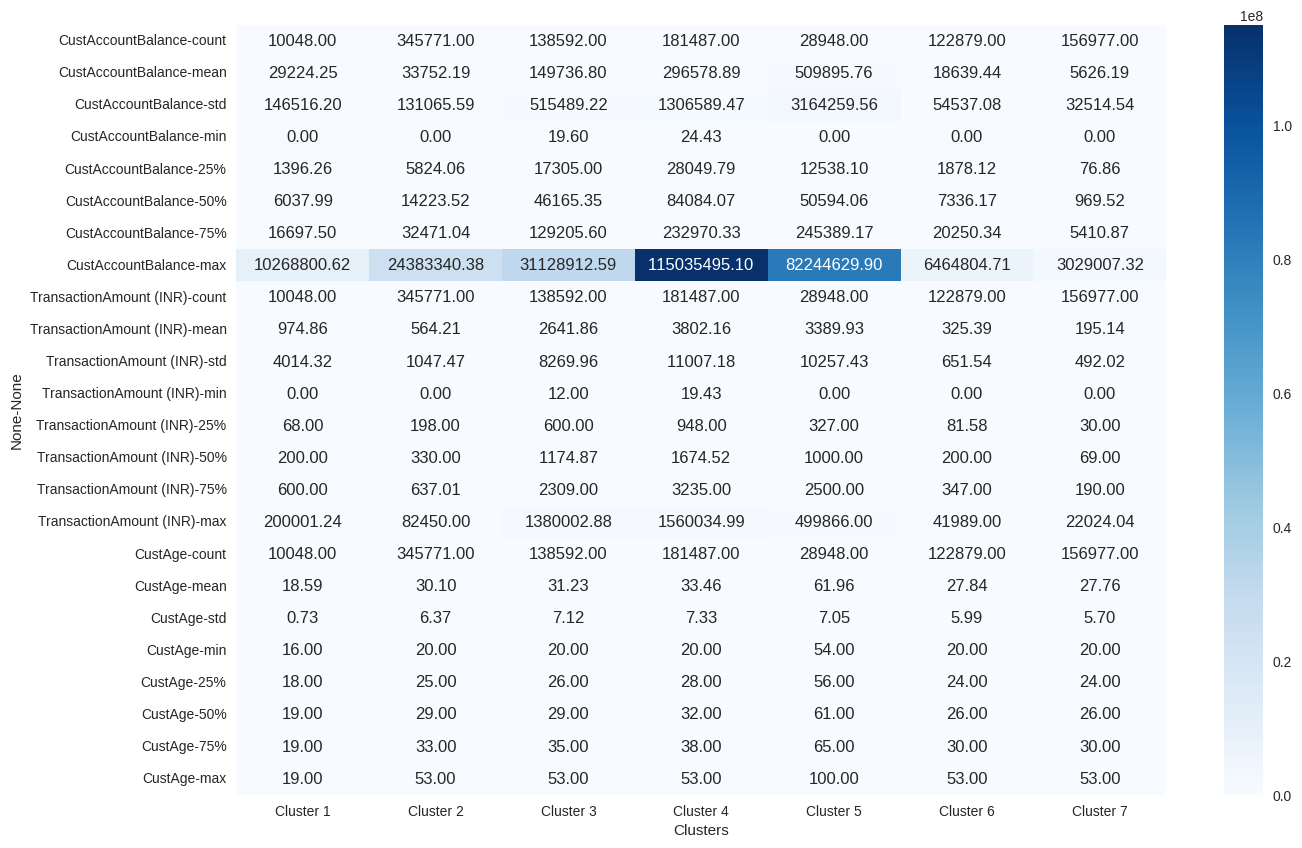

In [63]:
plt.figure(figsize = (15, 10))
sns.heatmap(summary, annot = True, cmap = 'Blues', fmt = '.2f')
plt.show()

In [64]:
final.groupby(['Clusters', 'CustGender'])['CustGender'].count()

Clusters   CustGender
Cluster 1  Female          2654
           Male            7394
Cluster 2  Male          345771
Cluster 3  Female        138592
Cluster 4  Male          181487
Cluster 5  Female          8395
           Male           20553
Cluster 6  Female        122879
Cluster 7  Female           141
           Male          156836
Name: CustGender, dtype: int64

In [65]:
final.shape

(984702, 11)

### **Generate Some Test Data for Future Usage**

In [66]:
df8 = final.head(900000)
test_data = final.tail(84702)
test_data.reset_index(drop = True, inplace = True)
df8.shape, test_data.shape

((900000, 11), (84702, 11))

# **Classification from Clustering Results**

At the beginning of our study, we didn't have any Label/Target Variable in our dataset, which we have now (Cluster Levels). From this we can develop classification models and predict in which group which individual/record should fall for new data.

We will choose the dataframe (data6) as it is cleaned, scaled and have gone through all the preprocessing. We will add the cluster levels from the dataframe "data8" and treat this as the target variable.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [68]:
df8.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge,Clusters
0,T1,C5841053,1994-10-01,Female,JAMSHEDPUR,17819.05,2/8/16,143207,25.00,22,Cluster 6
1,T2,C2142763,1957-04-04,Male,JHAJJAR,2270.69,2/8/16,141858,27999.00,59,Cluster 5
2,T3,C4417068,1996-11-26,Female,MUMBAI,17874.44,2/8/16,142712,459.00,20,Cluster 3
3,T4,C5342380,1973-09-14,Female,MUMBAI,866503.21,2/8/16,142714,2060.00,43,Cluster 3
4,T5,C9031234,1988-03-24,Female,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50,28,Cluster 3


In [69]:
df8.drop(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustLocation', 'TransactionDate', 'TransactionTime'], axis = 1, inplace = True)
df8.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge,Clusters
0,Female,17819.05,25.00,22,Cluster 6
1,Male,2270.69,27999.00,59,Cluster 5
2,Female,17874.44,459.00,20,Cluster 3
3,Female,866503.21,2060.00,43,Cluster 3
4,Female,6714.43,1762.50,28,Cluster 3


In [70]:
cols_to_log_trans = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustAge']

for column in cols_to_log_trans:
  df8[column] = np.log1p(df8[column])

df8.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge,Clusters
0,Female,9.79,3.26,3.14,Cluster 6
1,Male,7.73,10.24,4.09,Cluster 5
2,Female,9.79,6.13,3.04,Cluster 3
3,Female,13.67,7.63,3.78,Cluster 3
4,Female,8.81,7.48,3.37,Cluster 3


In [71]:
X = df8.drop('Clusters', axis = 1)
y = df8['Clusters']

In [72]:
X.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge
0,Female,9.79,3.26,3.14
1,Male,7.73,10.24,4.09
2,Female,9.79,6.13,3.04
3,Female,13.67,7.63,3.78
4,Female,8.81,7.48,3.37


In [73]:
y.head()

,Clusters
0,Cluster 6
1,Cluster 5
2,Cluster 3
3,Cluster 3
4,Cluster 3


In [74]:
X = pd.get_dummies(X, drop_first = True).astype(int)
X.head()

,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender_Male
0,9,3,3,0
1,7,10,4,1
2,9,6,3,0
3,13,7,3,0
4,8,7,3,0


In [75]:
X = pd.DataFrame(scaler.transform(X), columns = X.columns)
X.head()

,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender_Male
0,0.04,-1.55,-0.10,-1.62
1,-0.76,2.79,4.95,0.62
2,0.04,0.31,-0.10,-1.62
3,1.65,0.93,-0.10,-1.62
4,-0.36,0.93,-0.10,-1.62


In [76]:
X.shape

(900000, 4)

In [77]:
# Define the mapping dictionary
cluster_mapping = {
    'Cluster 1': 0,
    'Cluster 2': 1,
    'Cluster 3': 2,
    'Cluster 4': 3,
    'Cluster 5': 4,
    'Cluster 6': 5,
    'Cluster 7': 6
}

# Replace the values in y using the mapping
y = y.map(cluster_mapping)

# Verify the transformation
print(y.head())

0    5
1    4
2    2
3    2
4    2
Name: Clusters, dtype: int64


In [78]:
X.shape[0]

900000

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42, shuffle=True)

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [81]:
print(f"Training Score: {xgb.score(X_train, y_train)}")

Training Score: 1.0


In [82]:
# y_pred = xgb.predict(X_test)

# print(f"Testing Score: {xgb.score(y_test, y_pred)}")



```
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-79-70a358f9af74> in <cell line: 3>()
      1 y_pred = xgb.predict(X_test)
      2
----> 3 print(f"Testing Score: {xgb.score(y_test, y_pred)}")

4 frames
/usr/local/lib/python3.10/dist-packages/xgboost/core.py in _validate_features(self, feature_names)
   3077                 )
   3078
-> 3079             raise ValueError(msg.format(self.feature_names, feature_names))
   3080
   3081     def get_split_value_histogram(

ValueError: feature_names mismatch: ['CustAccountBalance', 'TransactionAmount (INR)', 'CustAge', 'CustGender_Male'] ['Clusters']
expected CustAccountBalance, CustGender_Male, TransactionAmount (INR), CustAge in input data
training data did not have the following fields: Clusters
```



In [83]:
print("Training Features:", X_train.columns)
print("Testing Features:", X_test.columns)

Training Features: Index(['CustAccountBalance', 'TransactionAmount (INR)', 'CustAge',
       'CustGender_Male'],
      dtype='object')
Testing Features: Index(['CustAccountBalance', 'TransactionAmount (INR)', 'CustAge',
       'CustGender_Male'],
      dtype='object')


In [84]:
# Drop 'Clusters' column if it exists
if 'Clusters' in X_test.columns:
    X_test = X_test.drop('Clusters', axis=1)

# Reorder columns to match training data
X_test = X_test[X_train.columns]

In [85]:
y_pred = xgb.predict(X_test)
print(f"Testing Score: {xgb.score(X_test, y_test)}")

Testing Score: 1.0


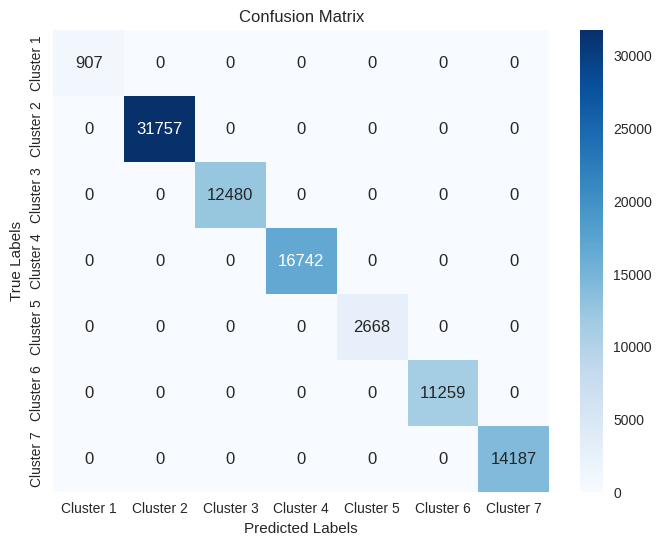

In [86]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [87]:
report = classification_report(y_test, y_pred, target_names=labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   Cluster 1       1.00      1.00      1.00       907
   Cluster 2       1.00      1.00      1.00     31757
   Cluster 3       1.00      1.00      1.00     12480
   Cluster 4       1.00      1.00      1.00     16742
   Cluster 5       1.00      1.00      1.00      2668
   Cluster 6       1.00      1.00      1.00     11259
   Cluster 7       1.00      1.00      1.00     14187

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



In [88]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr', average='macro')
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 1.0000


In [89]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, xgb.predict_proba(X_test))
print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.0000


In [90]:
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

CustGender_Male           0.67
CustAge                   0.11
CustAccountBalance        0.11
TransactionAmount (INR)   0.10
dtype: float32


In [91]:
xgb.predict([[5000, 120, 26, 1]])

array([4])

# **Evalute the Model using the Test Data**

In [92]:
test_data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustAge,Clusters
0,T958317,C7553328,1991-10-26,Female,MUMBAI,22712.59,10/9/16,192205,1419.00,25,Cluster 3
1,T958319,C5040614,1986-04-19,Male,DELHI,50.00,10/9/16,95532,60.00,30,Cluster 7
2,T958320,C4016740,1987-09-03,Female,MUMBAI,23047.42,10/9/16,194118,5400.00,29,Cluster 3
3,T958321,C2420269,1989-03-04,Female,KOLKATA,33290.49,10/9/16,194119,3203.00,27,Cluster 3
4,T958322,C3485920,1986-07-26,Male,GURGAON,72841.24,10/9/16,194121,678.00,30,Cluster 4


In [93]:
test_data.drop(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustLocation', 'TransactionDate', 'TransactionTime'], axis = 1, inplace = True)
test_data.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge,Clusters
0,Female,22712.59,1419.00,25,Cluster 3
1,Male,50.00,60.00,30,Cluster 7
2,Female,23047.42,5400.00,29,Cluster 3
3,Female,33290.49,3203.00,27,Cluster 3
4,Male,72841.24,678.00,30,Cluster 4


In [94]:
cols_to_log_trans = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustAge']

for column in cols_to_log_trans:
  test_data[column] = np.log1p(test_data[column])

test_data.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge,Clusters
0,Female,10.03,7.26,3.26,Cluster 3
1,Male,3.93,4.11,3.43,Cluster 7
2,Female,10.05,8.59,3.40,Cluster 3
3,Female,10.41,8.07,3.33,Cluster 3
4,Male,11.20,6.52,3.43,Cluster 4


In [95]:
test_x = test_data.drop('Clusters', axis = 1)
test_y = test_data['Clusters']

In [96]:
test_x.shape

(84702, 4)

In [97]:
test_x.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),CustAge
0,Female,10.03,7.26,3.26
1,Male,3.93,4.11,3.43
2,Female,10.05,8.59,3.40
3,Female,10.41,8.07,3.33
4,Male,11.20,6.52,3.43


In [98]:
test_x = pd.get_dummies(test_x, drop_first = True).astype(int)
test_x.head()

,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender_Male
0,10,7,3,0
1,3,4,3,1
2,10,8,3,0
3,10,8,3,0
4,11,6,3,1


In [99]:
test_x = pd.DataFrame(scaler.transform(test_x), columns = test_x.columns)
test_x.head()

,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender_Male
0,0.44,0.93,-0.10,-1.62
1,-2.37,-0.93,-0.10,0.62
2,0.44,1.55,-0.10,-1.62
3,0.44,1.55,-0.10,-1.62
4,0.85,0.31,-0.10,0.62


In [100]:
test_y.head()

,Clusters
0,Cluster 3
1,Cluster 7
2,Cluster 3
3,Cluster 3
4,Cluster 4


In [101]:
# Define the mapping dictionary
cluster_mapping = {
    'Cluster 1': 0,
    'Cluster 2': 1,
    'Cluster 3': 2,
    'Cluster 4': 3,
    'Cluster 5': 4,
    'Cluster 6': 5,
    'Cluster 7': 6
}

# Replace the values in y using the mapping
test_y = test_y.map(cluster_mapping)

# Verify the transformation
print(test_y.head())

0    2
1    6
2    2
3    2
4    3
Name: Clusters, dtype: int64


In [102]:
pred_y = xgb.predict(test_x)

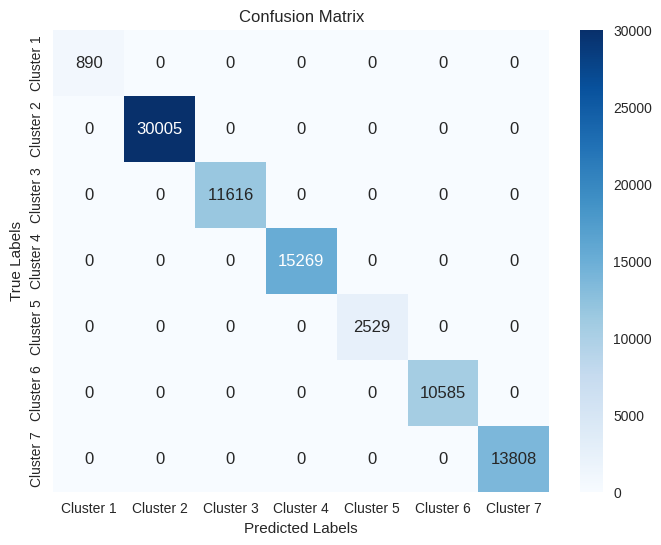

In [103]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

cm = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [104]:
report = classification_report(test_y, pred_y, target_names=labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   Cluster 1       1.00      1.00      1.00       890
   Cluster 2       1.00      1.00      1.00     30005
   Cluster 3       1.00      1.00      1.00     11616
   Cluster 4       1.00      1.00      1.00     15269
   Cluster 5       1.00      1.00      1.00      2529
   Cluster 6       1.00      1.00      1.00     10585
   Cluster 7       1.00      1.00      1.00     13808

    accuracy                           1.00     84702
   macro avg       1.00      1.00      1.00     84702
weighted avg       1.00      1.00      1.00     84702



In [105]:
roc_auc = roc_auc_score(test_y, xgb.predict_proba(test_x), multi_class='ovr', average='macro')
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 1.0000


In [106]:
logloss = log_loss(test_y, xgb.predict_proba(test_x))
print(f"Log-Loss: {logloss:.4f}")

Log-Loss: 0.0000
